A importação das bibliotecas juntamente com o conjunto de dados utilizado foi realizado da seguinte maneira:

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.9 MB/s 
     |████████████████████████████████| 16.7 MB 40.9 MB/s 
     |████████████████████████████████| 6.3 MB 38.5 MB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

O conjunto de dados analisado foi encontrado através do repositório "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University". A exibição dos dados que o Google utiliza também é baseada no mesmo dataset:

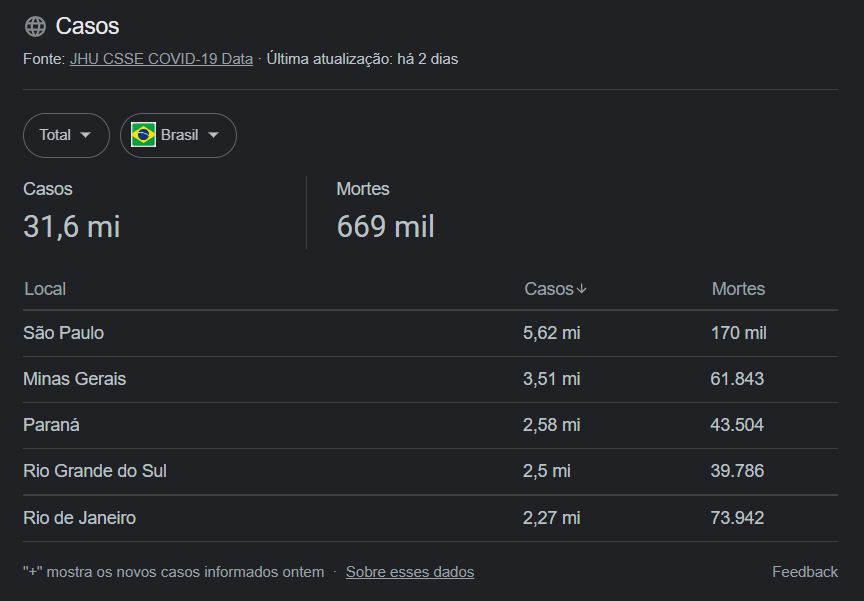

Dentro do repositório acima, podemos ver que a obtenção dos dados relacionados ao Brasil é realizada por Wesley Cota da Universidade federal de viçosa. O repositório dele pode ser encontrado a partir de : https://github.com/wcota/covid19br

In [5]:
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
!wget https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg

--2022-07-25 22:27:30--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3810667 (3.6M) [text/plain]
Saving to: ‘cases-brazil-states.csv’

cases-brazil-states 100%[===================>]   3.63M  --.-KB/s    in 0.05s   

2022-07-25 22:27:31 (76.6 MB/s) - ‘cases-brazil-states.csv’ saved [3810667/3810667]

--2022-07-25 22:27:31--  https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372666368 (355M)
Savi

Podemos ver todas as colunas da base de dados a seguir:

---



In [6]:
data = pd.read_csv('./cases-brazil-states.csv',nrows = 0, sep=',')
data 

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants


In [6]:
data.columns.values

array(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'], dtype=object)

Podemos selecionar quais colunas queremos analisar:

In [7]:
cols = ['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants']

In [23]:
cols = ['date','state','totalCases','vaccinated', 'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants']

In [24]:
data = pd.read_csv('./cases-brazil-states.csv', usecols = ['state'], sep=',') 
data

,state
0,SP
1,TOTAL
2,SP
3,TOTAL
4,SP
...,...
24229,SC
24230,SE
24231,SP
24232,TO


In [25]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
data

,date,state,totalCases,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,2020-02-25,SP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,TOTAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,SP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-26,TOTAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-27,SP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24229,2022-07-25,SC,1831006,6237943.0,87.06389,5701626.0,79.57843,277356.0,3.87110,3491346.0,48.72923
24230,2022-07-25,SE,339683,1972991.0,85.83088,1808361.0,78.66899,42047.0,1.82917,1211705.0,52.71271
24231,2022-07-25,SP,5882959,42396507.0,92.32880,39856763.0,86.79788,1276302.0,2.77946,33095195.0,72.07291
24232,2022-07-25,TO,336571,1157010.0,73.56062,992190.0,63.08166,54944.0,3.49324,474217.0,30.14987


É possível observar um ruído nos dados anteriores, há a ocorrência de diversas linhas com o Estado de "TOTAL", que representa  o total de casos por dia, podemos retirá-las para conseguir identificar apenas os estados que possuem casos registrados por dia

In [26]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
filtro = data['state'] != 'TOTAL'
dataFiltred = data[filtro]
dataFiltred

,date,state,totalCases,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,2020-02-25,SP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,SP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-27,SP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-02-28,SP,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02-29,SP,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24228,2022-07-25,RS,2623532,9722752.0,85.45792,9203579.0,80.89466,330054.0,2.90100,7045038.0,61.92221
24229,2022-07-25,SC,1831006,6237943.0,87.06389,5701626.0,79.57843,277356.0,3.87110,3491346.0,48.72923
24230,2022-07-25,SE,339683,1972991.0,85.83088,1808361.0,78.66899,42047.0,1.82917,1211705.0,52.71271
24231,2022-07-25,SP,5882959,42396507.0,92.32880,39856763.0,86.79788,1276302.0,2.77946,33095195.0,72.07291


Conseguimos identificar o tipo de cada campo

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   24234 non-null  object 
 1   state                                  24234 non-null  object 
 2   totalCases                             24234 non-null  int64  
 3   vaccinated                             15503 non-null  float64
 4   vaccinated_per_100_inhabitants         15503 non-null  float64
 5   vaccinated_second                      14823 non-null  float64
 6   vaccinated_second_per_100_inhabitants  14823 non-null  float64
 7   vaccinated_single                      10924 non-null  float64
 8   vaccinated_single_per_100_inhabitants  10924 non-null  float64
 9   vaccinated_third                       8664 non-null   float64
 10  vaccinated_third_per_100_inhabitants   8664 non-null   float64
dtypes:

In [28]:
data.dtypes

date                                      object
state                                     object
totalCases                                 int64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second                        float64
vaccinated_second_per_100_inhabitants    float64
vaccinated_single                        float64
vaccinated_single_per_100_inhabitants    float64
vaccinated_third                         float64
vaccinated_third_per_100_inhabitants     float64
dtype: object

Conseguimos identificar todos os valores não preenchidos nas colunas

In [29]:
data.isna().sum()

date                                         0
state                                        0
totalCases                                   0
vaccinated                                8731
vaccinated_per_100_inhabitants            8731
vaccinated_second                         9411
vaccinated_second_per_100_inhabitants     9411
vaccinated_single                        13310
vaccinated_single_per_100_inhabitants    13310
vaccinated_third                         15570
vaccinated_third_per_100_inhabitants     15570
dtype: int64

In [30]:
data.describe()

,totalCases,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
count,2.423400e+04,1.550300e+04,15503.000000,1.482300e+04,14823.000000,1.092400e+04,10924.000000,8.664000e+03,8664.000000
mean,1.084686e+06,8.392484e+06,53.148667,6.630132e+06,40.781028,3.451243e+05,2.285847,4.006504e+06,22.071898
std,3.471345e+06,2.515316e+07,29.959062,2.106509e+07,28.163709,9.019994e+05,1.412608,1.294473e+07,17.138510
min,1.000000e+00,2.000000e+00,0.000010,1.000000e+00,0.000000,3.500000e+01,0.000080,1.000000e+00,0.000000
25%,1.081752e+05,6.291230e+05,22.082860,3.964295e+05,11.091740,5.050300e+04,1.690460,2.000160e+05,6.208947
50%,3.044410e+05,2.437130e+06,66.205950,1.760829e+06,45.795210,1.140330e+05,1.962360,9.348030e+05,20.149200
75%,7.044428e+05,5.863186e+06,77.989040,4.559371e+06,67.044645,2.617970e+05,2.503420,2.134781e+06,36.081430
max,3.359136e+07,1.798616e+08,96.646030,1.648217e+08,86.797880,5.346646e+06,9.298280,1.152890e+08,72.072910


In [31]:
data['state'].value_counts()

SP       882
TOTAL    882
RJ       873
BA       872
ES       872
DF       871
AL       870
MG       870
RS       868
GO       866
PE       866
PR       866
RN       866
SC       866
AM       865
MS       864
SE       864
CE       862
AC       861
PA       860
PB       860
TO       860
PI       859
AP       858
MA       858
MT       858
RO       858
RR       857
Name: state, dtype: int64

In [32]:
data['year'] = pd.DatetimeIndex(data['date']).year

Podemos fitrar os numeros totais de casos ocorrido dentro de um período específico. Como por exemplo:

In [33]:
data_groupby = data.groupby('year')['totalCases'].sum()
data_groupby

year
2020     1784457032
2021    12414999752
2022    12086835740
Name: totalCases, dtype: int64

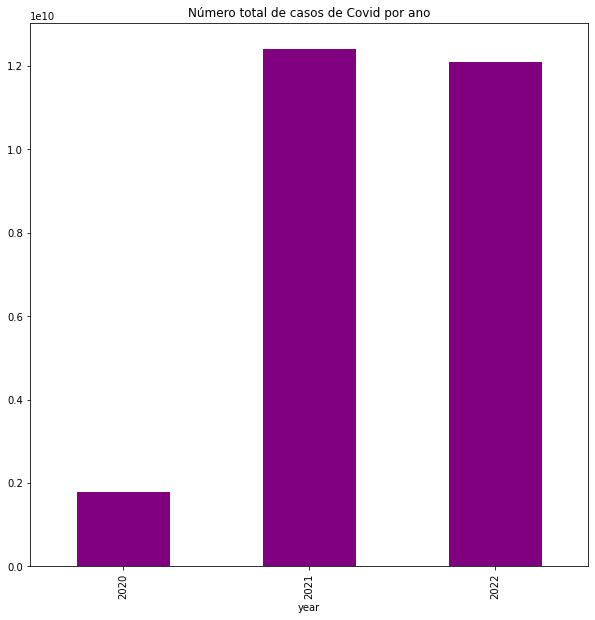

In [34]:
plt.figure(figsize=(10,10))
plt.title("Número total de casos de Covid por ano")
data_groupby.plot(kind='bar', x='date', y='totalCases', color='purple', label = 'totalCases')

## Relação entre vacinação e Estados

### Eliminando ruídos do dataset

In [35]:
data_without_nan_values = data.dropna()
data_without_nan_values

,date,state,totalCases,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,year
15089,2021-09-02,MS,369475,1836215.0,66.07500,1053662.0,37.91534,234861.0,8.45132,282.0,0.01015,2021
15105,2021-09-02,TOTAL,20834790,133236457.0,62.45918,60244403.0,28.24164,4661248.0,2.18512,282.0,0.00013,2021
15117,2021-09-03,MS,369733,1839113.0,66.17928,1067906.0,38.42790,234861.0,8.45132,373.0,0.01342,2021
15133,2021-09-03,TOTAL,20858394,133983801.0,62.80953,61424341.0,28.79478,4669260.0,2.18888,373.0,0.00017,2021
15145,2021-09-04,MS,369916,1844651.0,66.37856,1075969.0,38.71804,234871.0,8.45168,537.0,0.01932,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
24229,2022-07-25,SC,1831006,6237943.0,87.06389,5701626.0,79.57843,277356.0,3.87110,3491346.0,48.72923,2022
24230,2022-07-25,SE,339683,1972991.0,85.83088,1808361.0,78.66899,42047.0,1.82917,1211705.0,52.71271,2022
24231,2022-07-25,SP,5882959,42396507.0,92.32880,39856763.0,86.79788,1276302.0,2.77946,33095195.0,72.07291,2022
24232,2022-07-25,TO,336571,1157010.0,73.56062,992190.0,63.08166,54944.0,3.49324,474217.0,30.14987,2022


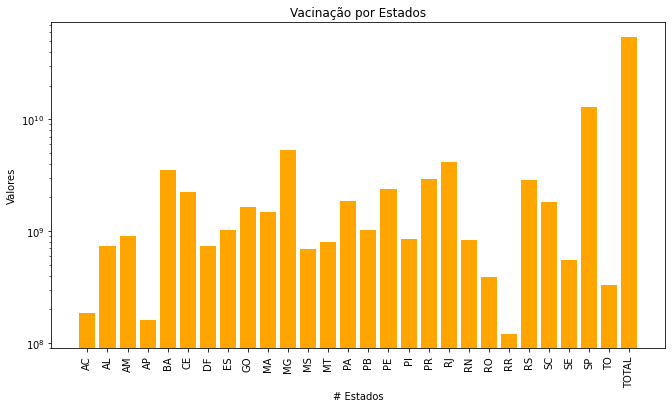

In [36]:
vaccinated_per_state = data_without_nan_values.groupby('state')['vaccinated'].sum()

plt.figure(figsize =(11, 6))
plt.bar(vaccinated_per_state.index, vaccinated_per_state.values, color = 'orange')
plt.ylabel("Valores")
plt.xlabel("# Estados")
plt.title("Vacinação por Estados")
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()


## Analise de vacinação no estado de Minas Gerais

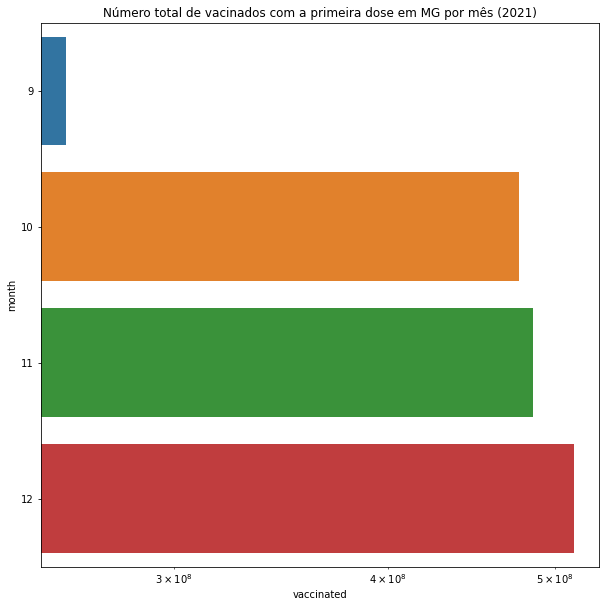

In [37]:
def total_vaccinated_per_year_by_state(state,year):
    data_with_month_column = data_without_nan_values.assign(month = pd.DatetimeIndex(data_without_nan_values['date']).month)
    total_vaccinated_per_month_in_mg = data_with_month_column[data_with_month_column['state'] == state]
    return total_vaccinated_per_month_in_mg[total_vaccinated_per_month_in_mg['year'] == year]


def mg_vaccinated(field,title):
    mg_2021_single = total_vaccinated_per_year_by_state("MG",2021).groupby('month')[field].sum().reset_index()
    plt.figure(figsize=(10,10))
    g=sns.barplot(data=mg_2021_single, y='month', x=field, orient='h')
    g.set_xscale('log')
    plt.title(title)
    plt.show()

mg_vaccinated('vaccinated',"Número total de vacinados com a primeira dose em MG por mês (2021)")

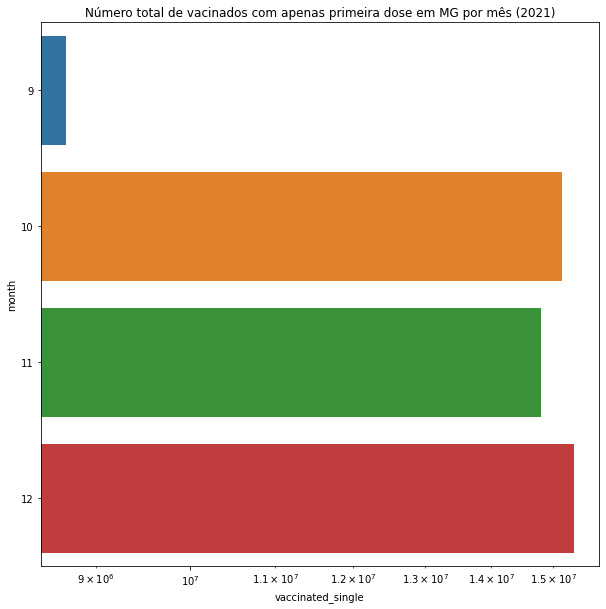

In [38]:
mg_vaccinated('vaccinated_single','Número total de vacinados com apenas primeira dose em MG por mês (2021)')

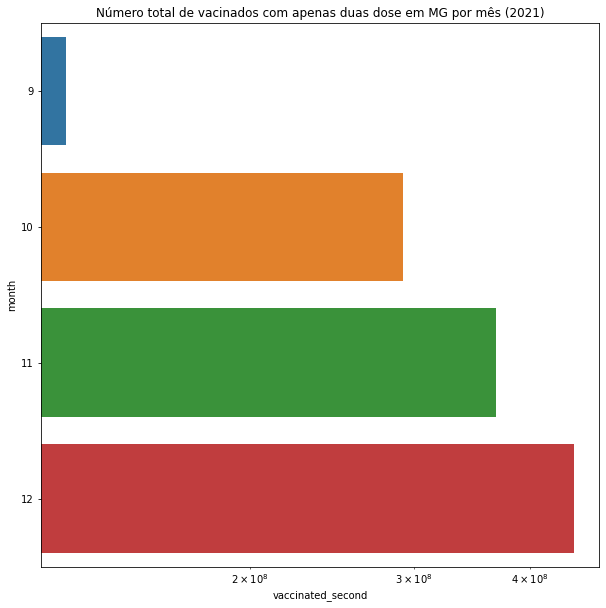

In [39]:
mg_vaccinated('vaccinated_second','Número total de vacinados com apenas duas dose em MG por mês (2021)')

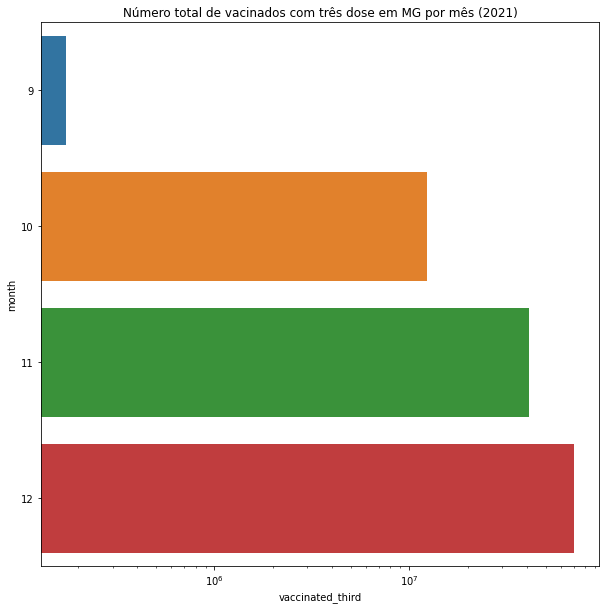

In [40]:
mg_vaccinated('vaccinated_third','Número total de vacinados com três dose em MG por mês (2021)')

## Mapa de calor referente a vacinação

In [69]:

display(data_without_nan_values.groupby('state')['vaccinated_per_100_inhabitants'].sum().sort_values())

state
AP       19103.33216
RR       19983.81297
AC       20789.48551
TO       21061.31480
MA       21136.12592
PA       21475.91618
RO       21676.13839
AM       21763.91979
AL       22035.84518
MT       22887.84782
BA       23433.88525
GO       23480.04406
RN       23829.72098
RJ       23851.80032
SE       24174.17143
DF       24460.16213
CE       24554.01673
MS       24799.45871
RS       25061.67290
PE       25112.09828
MG       25166.34059
PB       25210.83086
TOTAL    25465.30413
ES       25617.65376
SC       25661.04186
PR       25747.41247
PI       25953.83796
SP       28097.74296
Name: vaccinated_per_100_inhabitants, dtype: float64

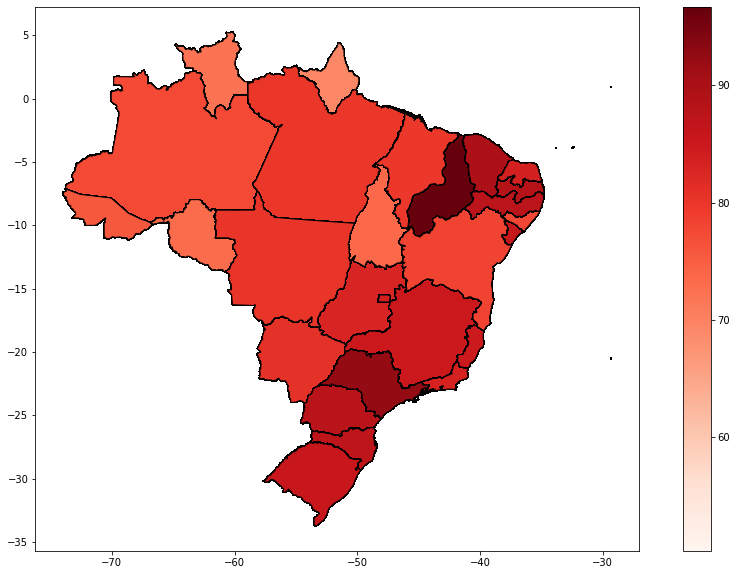

In [41]:
INFOS_UFS = gpd.read_file('./bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')
INFOS_UFS.rename({'sigla':'state'}, axis = 1, inplace = True)

df_br = INFOS_UFS.merge(data_without_nan_values, on = 'state', how = 'left')

df_br.plot(column = 'vaccinated_per_100_inhabitants',
    cmap  = 'Reds',
    figsize = (16,10),
    legend = True,
    edgecolor = 'black',
    
    )

# Transformação de dados 


# Regressão  


## Coleta de colunas de interesse para realizar algumas análises

Análisando a tabela de correlações podemos manter ou retirar algumas colunas para realizar a regressão

In [8]:
cols_interesse = [
        'totalCases_per_100k_inhabitants', 'recovered', 'suspects',
       'tests_per_100k_inhabitants',
       'vaccinated_per_100_inhabitants', 
       'vaccinated_second_per_100_inhabitants', 
       'vaccinated_single_per_100_inhabitants', 
       'vaccinated_third_per_100_inhabitants']
target = 'state'

In [9]:
cols_interesse_all = cols_interesse.copy()
#cols_interesse_all.append(target)  
data = pd.read_csv('./cases-brazil-states.csv')

df = data.dropna() 
df[cols_interesse_all]

,totalCases_per_100k_inhabitants,recovered,suspects,tests_per_100k_inhabitants,vaccinated_per_100_inhabitants,vaccinated_second_per_100_inhabitants,vaccinated_single_per_100_inhabitants,vaccinated_third_per_100_inhabitants
15089,13295.31707,354985.0,1381.0,37019.54598,66.07500,37.91534,8.45132,0.01015
15105,9767.02635,19138604.0,7958935.0,26706.17267,62.45918,28.24164,2.18512,0.00013
15117,13304.60103,357475.0,1381.0,37349.52245,66.17928,38.42790,8.45132,0.01342
15133,9778.09153,19243454.0,7958935.0,26765.35296,62.80953,28.79478,2.18888,0.00017
15145,13311.18617,357475.0,1381.0,37349.52245,66.37856,38.71804,8.45168,0.01932
...,...,...,...,...,...,...,...,...
24229,25555.62007,1607144.0,268966.0,35847.42493,87.06389,79.57843,3.87110,48.72923
24230,14777.20412,313577.0,445.0,26283.72782,85.83088,78.66899,1.82917,52.71271
24231,12811.58719,4850000.0,876238.0,42469.91918,92.32880,86.79788,2.77946,72.07291
24232,21398.58068,281464.0,359.0,57473.10960,73.56062,63.08166,3.49324,30.14987


## Correlações 
A correlação diz se dois atributos no dataset possuem alguma relação. 

In [10]:
correlations = df.corr()
print(correlations)

                                       epi_week  newDeaths    deaths  \
epi_week                               1.000000  -0.045665 -0.004646   
newDeaths                             -0.045665   1.000000  0.714955   
deaths                                -0.004646   0.714955  1.000000   
newCases                               0.089307   0.744765  0.592790   
totalCases                             0.039460   0.687838  0.987722   
deathsMS                              -0.004638   0.714920  1.000000   
totalCasesMS                           0.039466   0.687714  0.987714   
deaths_per_100k_inhabitants            0.130536   0.056239  0.092174   
totalCases_per_100k_inhabitants        0.385396  -0.099867 -0.113155   
deaths_by_totalCases                  -0.369592   0.169332  0.207789   
recovered                              0.026256   0.685664  0.991219   
suspects                              -0.003072   0.639896  0.883580   
tests                                  0.000391   0.706774  0.99

In [11]:
df.dtypes

epi_week                                   int64
date                                      object
country                                   object
state                                     object
city                                      object
newDeaths                                  int64
deaths                                     int64
newCases                                   int64
totalCases                                 int64
deathsMS                                   int64
totalCasesMS                               int64
deaths_per_100k_inhabitants              float64
totalCases_per_100k_inhabitants          float64
deaths_by_totalCases                     float64
recovered                                float64
suspects                                 float64
tests                                    float64
tests_per_100k_inhabitants               float64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second   

In [12]:
df['state'] = df["state"].astype('category')
df['state'] = df['state'].cat.codes 
df['city'] = df["city"].astype('category')
df['city'] = df['city'].cat.codes 
df['country'] = df["country"].astype('category')
df['country'] = df['country'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [71]:
df = pd.get_dummies(df, columns=["state"])

In [70]:
df = df.drop(['date'], axis=1)

In [18]:
df.dtypes

epi_week                                   int64
country                                     int8
city                                        int8
newDeaths                                  int64
deaths                                     int64
newCases                                   int64
totalCases                                 int64
deathsMS                                   int64
totalCasesMS                               int64
deaths_per_100k_inhabitants              float64
totalCases_per_100k_inhabitants          float64
deaths_by_totalCases                     float64
recovered                                float64
suspects                                 float64
tests                                    float64
tests_per_100k_inhabitants               float64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second                        float64
vaccinated_second_per_100_inhabitants    float64
vaccinated_single   

# Utilização de coeficiente de person para verificar relação entre variáveis

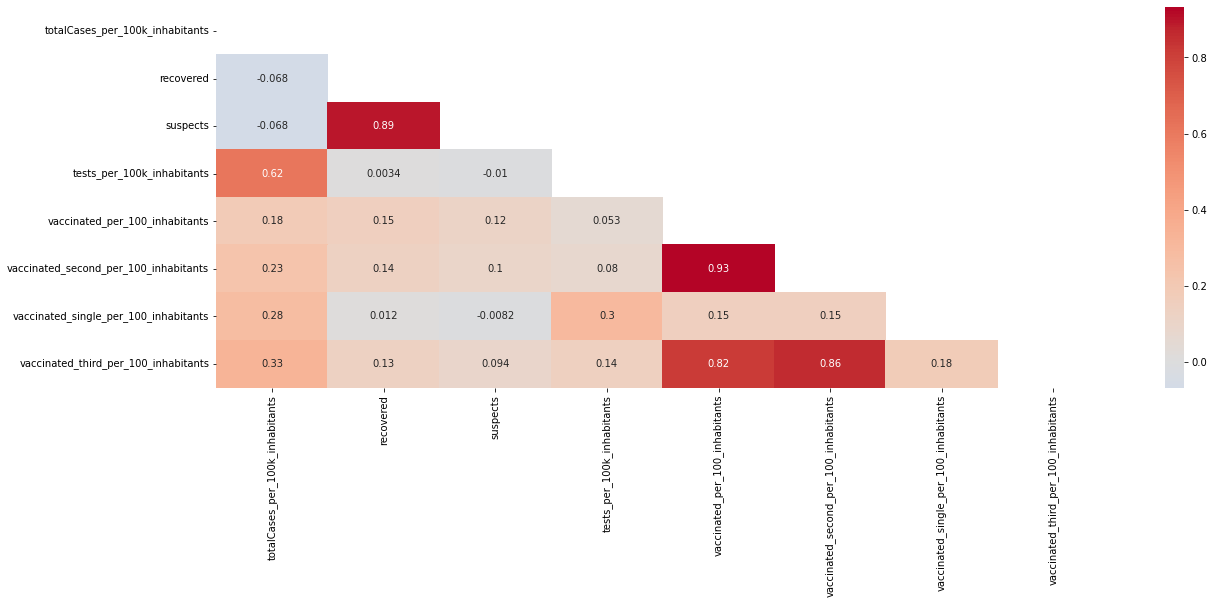

In [20]:


Var_Corr = df[cols_interesse_all].corr()
matrix = np.triu(df[cols_interesse_all].corr())

plt.figure(figsize = (20,7))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,\
            annot=True,center= 0, cmap= 'coolwarm',mask=matrix)

In [77]:
from sklearn.linear_model import LinearRegression

def regressao_linear(X,Y,cols):

  if len(cols) == 1:
    X = X.values.reshape(-1,1)

  lm = LinearRegression()
  lm.fit(X,Y)
  print('Coeficiente estimado: ', lm.coef_)    
  print('R2 (score): ', lm.score(X,Y))
  print("Intercept %.3f " % lm.intercept_)

  coeff_df = pd.DataFrame(lm.coef_, cols, columns=['Coefficient'])
  print(coeff_df)


In [22]:
import statsmodels.api as sm  
Y = df['suspects']
cols_interesse_novo = ['recovered'] 

X = df[cols_interesse_novo] 
results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())                  

                                 OLS Regression Results                                
Dep. Variable:               suspects   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                          4.005e+04
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                        0.00
Time:                        22:35:30   Log-Likelihood:                     -1.3011e+05
No. Observations:                8664   AIC:                                  2.602e+05
Df Residuals:                    8663   BIC:                                  2.602e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Perguntas 

## 1) Qual região do país apresentou maior apatia ao programa de vacinação contra a COVID-19?

## 2) Qual região brasileira apresentou maior redução de mortes causadas por COVID-19 após o início das vacinações (Março/Abril 2021)?

## 3) Qual região brasileira é mais afetada pela COVID-19?

## 4) Qual o avanço da COVID-19 no interior do Brasil?

## 5) Qual o aumento relativo de casos suspeitos de COVID-19 em 2022?

## 6) Qual o percentual de ocupação hospitalar durante a pandemia?

## 7) Qual ano houve a maior incidência de COVID-19 na região sudeste do Brasil?

## 8) Qual estado apresentou maior número de casos por 100 mil habitantes no ano de 2021?

## 9) Qual estado apresentou maior número de mortes por 100 mil habitantes no ano de 2021?


## 10) Qual estado apresentou maior número de recuperados nos três anos de pandemia?


## 11) Qual estado em teria maior simpatia por uma nova dose de vacina?


## 12) Há alguma relação entre estados e quantidade de doses aplicadas?


## 13) Houve redução no número de casos de COVID-19 após 1 ano da aplicação da primeira dose da vacina contra COVID-19?


## 14) Houve redução no número de testes de COVID-19 após 1 ano da aplicação da primeira dose da vacina contra COVID-19?


## 15) Qual estado realizou a maior testagem nos três anos?


## 16) Qual estado aplicou mais vacinas até o momento?